#Question and Answer Text Analysis

## Load Libraries

In [1]:
#run both R and python 
%load_ext rpy2.ipython

In [2]:
#mount google drive to load pre installs and zipped libraries
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#extract library zip file "cv.library.tar.gz" from location - https://drive.google.com/drive/folders/1z3tM37Cf7zr3hXF5EtPMRnMwdoEb6arm
#make sure the folder is added to your personal google drive
%cp drive/MyDrive/R_libraries/cv.library.tar.gz .

In [4]:
!du -sh cv.library.tar.gz

214M	cv.library.tar.gz


In [5]:
#copy library to current colab directory
!tar xf cv.library.tar.gz

tar: Removing leading `/' from member names


In [6]:
%ls usr/local/lib/R/site-library/

BH/           IRdisplay/    mgsub/     qdapRegex/   stringdist/  tm/
crosstalk/    IRkernel/     NLP/       Rcpp/        syuzhet/     tokenizers/
dtt/          janeaustenr/  pacman/    repr/        textclean/   wordcloud/
english/      later/        pbdZMQ/    reshape2/    textshape/   zoo/
ggplot2/      lazyeval/     plotly/    sentimentr/  tibble/
htmlwidgets/  lexicon/      plyr/      slam/        tidytext/
hunspell/     lubridate/    promises/  SnowballC/   tidyverse/


In [7]:
%%R
.libPaths('usr/local/lib/R/site-library/')
.libPaths()

[1] "/content/usr/local/lib/R/site-library"
[2] "/usr/local/lib/R/site-library"        
[3] "/usr/lib/R/site-library"              
[4] "/usr/lib/R/library"                   


In [8]:
#install python libraries
from IPython.display import display, HTML

In [9]:
#load R libraries
#use %%R for every cell that runs R code
%%R
library(tidyverse)
library(dplyr)
library(plotly)
library(lubridate)
library(ggplot2)
library(readr)
#text similarity, sentiment analysis libraries
library(tidytext)
library(stringdist)
library(tm)
library(wordcloud)
library(reshape2)
pacman::p_load_current_gh("trinker/lexicon", "trinker/sentimentr")

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: 
Attaching package: ‘plotly’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    last_plot


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: The following object is masked from ‘package:graphics’:

    layout


R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


R[write to console]: 
Attaching package: ‘stringdist’


R[

## Load data

In [10]:
%%R
#load questions and answers data
questions_url <- 'https://media.githubusercontent.com/media/nthammadi-uncc/CareerVillage/main/data/clean/questions.csv'
answers_url <- 'https://media.githubusercontent.com/media/nthammadi-uncc/CareerVillage/main/data/clean/answers.csv'
questions_df <- read.csv(questions_url)
answers_df <- read.csv(answers_url)
print(dim(questions_df))
print(dim(answers_df))

[1] 23931    21
[1] 51123    18


In [11]:
%%R
str(questions_df)
str(answers_df)

'data.frame':	23931 obs. of  21 variables:
 $ X                           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ questions_id                : chr  "332a511f1569444485cf7a7a556a5e54" "eb80205482e4424cad8f16bc25aa2d9c" "4ec31632938a40b98909416bdd0decff" "2f6a9a99d9b24e5baa50d40d0ba50a75" ...
 $ questions_author_id         : chr  "8f6f374ffd834d258ab69d376dd998f5" "acccbda28edd4362ab03fb8b6fd2d67b" "f2c179a563024ccc927399ce529094b5" "2c30ffba444e40eabb4583b55233a5a4" ...
 $ questions_date_added        : chr  "2016-04-26 11:14:26 UTC+0000" "2016-05-20 16:48:25 UTC+0000" "2017-02-08 19:13:38 UTC+0000" "2017-09-01 14:05:32 UTC+0000" ...
 $ questions_title             : chr  "Teacher   career   question" "I want to become an army officer. What can I do to become an army officer?" "Will going abroad for your first job increase your chances for jobs back home?" "To become a specialist in business  management, will I have to network myself?" ...
 $ questions_body              : chr  "What  is  a  m

## Text Similarity Analysis

### Text Similarity measures of questions with tags

In [12]:
%%R
#create similarity index columns and initialize to NA
questions_df['question_tag_sim_index'] <- NA


In [13]:
%%R
# check similarities between tags and question title, body
for (i in 1:nrow(questions_df)) {
    #get the tags cell value
    tags <- c(questions_df[i,8]) #8th column is all_tags
    ques_title <- c(questions_df[i,5]) #5th column is question title
    ques_body <- c(questions_df[i,6]) #6th column is question body
    #get similarity indexes using Jaccard distance method
    question_title_tag_sim_index <- stringdist(tags,ques_title, method="jaccard") 
    question_body_tag_sim_index<- stringdist(tags,ques_body, method="jaccard") 
    questions_df[i,22] <- (question_title_tag_sim_index+question_body_tag_sim_index)/2  #22nd column is question_tag_sim_index; take the average of both similarity
}


In [14]:
%%R
summary(questions_df)

       X         questions_id       questions_author_id questions_date_added
 Min.   :    1   Length:23931       Length:23931        Length:23931        
 1st Qu.: 5984   Class :character   Class :character    Class :character    
 Median :11966   Mode  :character   Mode  :character    Mode  :character    
 Mean   :11966                                                              
 3rd Qu.:17948                                                              
 Max.   :23931                                                              
 questions_title    questions_body     question_score    all_tags        
 Length:23931       Length:23931       Min.   :  0.0   Length:23931      
 Class :character   Class :character   1st Qu.:  1.0   Class :character  
 Mode  :character   Mode  :character   Median :  2.0   Mode  :character  
                                       Mean   :  2.9                     
                                       3rd Qu.:  3.0                     
                 

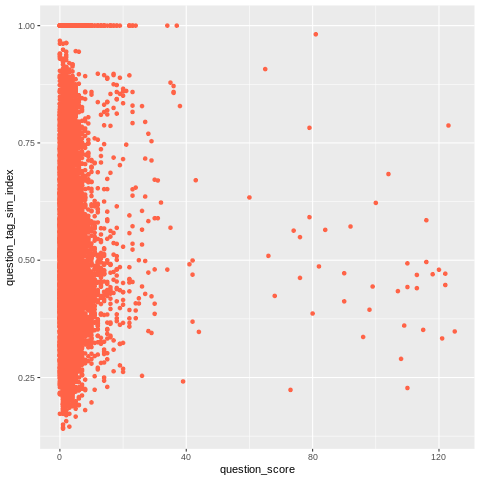

In [15]:
%%R
# scatter plot of question score with question_tag similarity index
ggplot(questions_df, aes(x=question_score, y=question_tag_sim_index)) + geom_point(color="tomato")

### Text Similarity measures of answers with tags

In [16]:
%%R
#create similarity index columns and initialize to NA
answers_df['answer_tag_sim_index'] <- NA


In [17]:
%%R
# check similarities between tags and answers
for (i in 1:nrow(answers_df)) {
    #get the tags cell value
    tags <- c(answers_df[i,17]) #17th column is all_tags
    answer_body <- c(answers_df[i,6]) #6th column is answer
    #get similarity indexes using Jaccard distance method
    answers_df[i,19] <- stringdist(tags,answer_body, method="jaccard") #19th column is answer_tag_sim_index; 
}


In [18]:
%%R
summary(answers_df)

       X          answers_id        answers_author_id  answers_question_id
 Min.   :    1   Length:51123       Length:51123       Length:51123       
 1st Qu.:12782   Class :character   Class :character   Class :character   
 Median :25562   Mode  :character   Mode  :character   Mode  :character   
 Mean   :25562                                                            
 3rd Qu.:38342                                                            
 Max.   :51123                                                            
 answers_date_added answers_body        answer_score     total_comments  
 Length:51123       Length:51123       Min.   : 0.0000   Min.   : 0.000  
 Class :character   Class :character   1st Qu.: 0.0000   1st Qu.: 0.000  
 Mode  :character   Mode  :character   Median : 0.0000   Median : 0.000  
                                       Mean   : 0.4154   Mean   : 0.246  
                                       3rd Qu.: 1.0000   3rd Qu.: 0.000  
                               

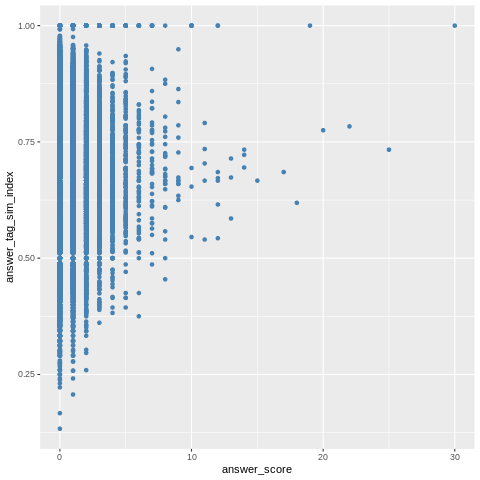

In [19]:
%%R
# scatter plot of answer score with answer_tag similarity index
ggplot(answers_df, aes(x=answer_score, y=answer_tag_sim_index)) + geom_point(color="steelblue")

## Sentiment Analysis

### Sentiment Analysis of questions

In [20]:
%%R 
##combine question text and body into one column
questions_df$questions_title_body <- paste(questions_df$questions_title,questions_df$questions_body)

In [21]:
%%R
#get the corpus of text
corpus <- iconv(questions_df$questions_title_body)
corpus <- Corpus(VectorSource(corpus))
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] Teacher   career   question What  is  a  maths  teacher?   what  is  a  maths  teacher  useful? #college #professor #lecture                                                                                                                                                                                                                                                                                                                                                                                                                                                   
[2] I want to become an army officer. What can I do to become an army officer? I am Priyanka from Bangalore . Now am in 10th std . When I go to college I should not get confused on what I want to take to become army officer. So I am asking this question  #military #army                                                                  

In [22]:
%%R
#clean the text
#change case to lower
corpus <- tm_map(corpus, tolower)
#remove punctuations
corpus <- tm_map(corpus, removePunctuation)
#remove numbers
corpus <- tm_map(corpus, removeNumbers)
#remove stopwords
cleanset <- tm_map(corpus, removeWords, stopwords('english'))
#remove any urls
removeURL <- function(x) gsub('http[[:alnum:]]*', '', x)
cleanset <- tm_map(cleanset, content_transformer(removeURL))
#text remove white spaces
cleanset <- tm_map(cleanset, stripWhitespace)
#remove additional stop words
cleanset <- tm_map(cleanset, removeWords, c('can','cant','get','ive','will','one','also'))
#replace some words
cleanset <- tm_map(cleanset, gsub,
                   pattern = 'jobs',
                   replacement = 'job')
inspect(cleanset[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] teacher career question maths teacher maths teacher useful college professor lecture                                                                                                                                                                                                                                                                                                       
[2]  want become army officer  become army officer priyanka bangalore now th std go college  confused want take become army officer asking question military army                                                                                                                                                                                                                              
[3]  going abroad first job increase chances job back home im planning going abroad first job  teaching job dont serious career idea

In [23]:
%%R
#create document term matrix
tdm_questions <- TermDocumentMatrix(cleanset)
tdm_questions <- as.matrix(tdm_questions)
tdm_questions[1:10, 1:20]

           Docs
Terms       1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  career    1 0 1 0 0 0 0 0 1  0  0  0  0  0  0  0  0  0  0  1
  college   1 1 0 0 1 0 1 2 3  0  0  0  0  0  0  0  0  3  0  2
  lecture   1 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  maths     2 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  professor 1 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  question  1 1 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  teacher   3 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  useful    1 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  army      0 4 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0
  asking    0 1 0 0 0 0 0 0 1  0  0  0  0  0  0  0  0  0  0  0


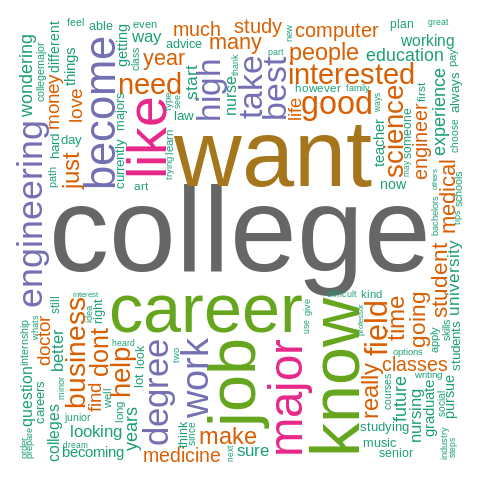

In [24]:
%%R
#plot a word cloud of questions text
w <- sort(rowSums(tdm_questions), decreasing = TRUE)
set.seed(222)
wordcloud(words = names(w),
          freq = w,
          max.words = 200,
          random.order = F,
          min.freq = 5,
          colors = brewer.pal(8, 'Dark2'),
          scale = c(10, 0.3),
          rot.per = 0.7)

In [25]:
%%R
#convert corpus into dataframe
cleanset_df<-data.frame(text= get("content", cleanset))
print(dim(cleanset_df))

[1] 23931     1


In [26]:
%%R
#tokenize corpus
cleanset_df <- cleanset_df %>% unnest_tokens(word, text)
head(cleanset_df)

      word
1  teacher
2   career
3 question
4    maths
5  teacher
6    maths


Joining, by = "word"


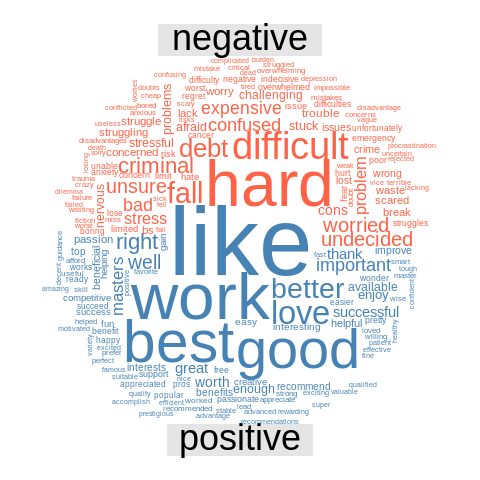

In [27]:
%%R
#plot a word cloud of sentiment
wordcloud_sentiment <- cleanset_df %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("tomato", "steelblue"), scale=c(8,.5),
                   max.words = 200)


In [28]:
%%R 
#get question id and score and merge with corpus
question_details_df <- select(questions_df, c(questions_id, question_score))
question_details_df$question_corpus <- NA
question_details_df$question_corpus<- cleanset$content
print(dim(question_details_df))

[1] 23931     3


In [29]:
%%R
str(question_details_df)

'data.frame':	23931 obs. of  3 variables:
 $ questions_id   : chr  "332a511f1569444485cf7a7a556a5e54" "eb80205482e4424cad8f16bc25aa2d9c" "4ec31632938a40b98909416bdd0decff" "2f6a9a99d9b24e5baa50d40d0ba50a75" ...
 $ question_score : num  1 5 2 2 2 1 2 1 3 1 ...
 $ question_corpus: chr  "teacher career question maths teacher maths teacher useful college professor lecture" " want become army officer  become army officer priyanka bangalore now th std go college  confused want take bec"| __truncated__ " going abroad first job increase chances job back home im planning going abroad first job  teaching job dont se"| __truncated__ " become specialist business management  network hear business management hard way  job youre known right areas "| __truncated__ ...


In [30]:
%%R
# add sentiment score to question text
question_details_df$sentiment_score <- sentiment(question_details_df$question_corpus)$sentiment 
question_details_df <- question_details_df %>% 
      mutate(sentiment_category = case_when(
      sentiment_score < 0 ~ 'Negative',
      sentiment_score == 0 ~ 'Neutral',
      sentiment_score > 0 ~ 'Positive'
      ) %>%
      factor(levels = c('Negative', 'Neutral', 'Positive'))
      )
str(question_details_df)

'data.frame':	23931 obs. of  5 variables:
 $ questions_id      : chr  "332a511f1569444485cf7a7a556a5e54" "eb80205482e4424cad8f16bc25aa2d9c" "4ec31632938a40b98909416bdd0decff" "2f6a9a99d9b24e5baa50d40d0ba50a75" ...
 $ question_score    : num  1 5 2 2 2 1 2 1 3 1 ...
 $ question_corpus   : chr  "teacher career question maths teacher maths teacher useful college professor lecture" " want become army officer  become army officer priyanka bangalore now th std go college  confused want take bec"| __truncated__ " going abroad first job increase chances job back home im planning going abroad first job  teaching job dont se"| __truncated__ " become specialist business management  network hear business management hard way  job youre known right areas "| __truncated__ ...
 $ sentiment_score   : num  0.4975 -0.1021 0.1707 0.3274 0.0853 ...
 $ sentiment_category: Factor w/ 3 levels "Negative","Neutral",..: 3 1 3 3 3 2 3 3 3 3 ...


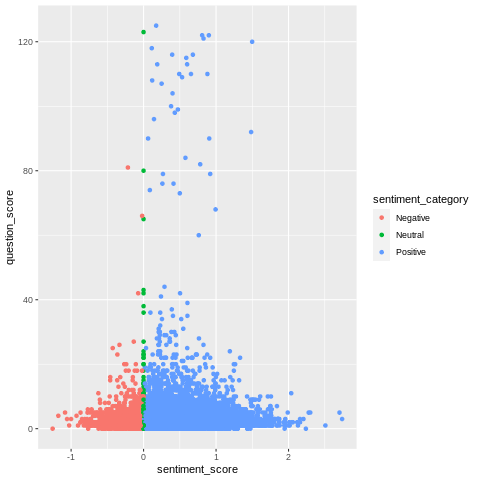

In [31]:
%%R
# scatter plot of sentiment score and question score
ggplot(question_details_df, aes(x=sentiment_score, y=question_score)) + geom_point(aes(color=sentiment_category))

### Sentiment Analysis of answers

In [32]:
%%R
#get the corpus of text
corpus <- iconv(answers_df$answers_body)
corpus <- Corpus(VectorSource(corpus))
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] <p>Hi!</p>\n<p>You are asking a very interesting question.  I am giving you two sites that will give you some of an explanation that may answer your question.</p>\n<p>http://mathforum.org/dr.math/faq/faq.why.math.html</p>\n<p>http://www.mathworksheetscenter.com/mathtips/mathissoimportant.html</p>\n<p>Let me know if this helps</p>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [33]:
%%R
#clean the text
#change case to lower
corpus <- tm_map(corpus, tolower)
#remove punctuations
corpus <- tm_map(corpus, removePunctuation)
#remove numbers
corpus <- tm_map(corpus, removeNumbers)
#remove stopwords
cleanset <- tm_map(corpus, removeWords, stopwords('english'))
#remove any urls
removeURL <- function(x) gsub('http[[:alnum:]]*', '', x)
cleanset <- tm_map(cleanset, content_transformer(removeURL))
#text remove white spaces
cleanset <- tm_map(cleanset, stripWhitespace)
#remove additional stop words
#cleanset <- tm_map(cleanset, removeWords, c('can','cant','get','ive','will','one','also'))
#replace some words
#cleanset <- tm_map(cleanset, gsub,
#                   pattern = 'jobs',
#                   replacement = 'job')
inspect(cleanset[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] phip pyou asking interesting question giving two sites will give explanation may answer questionp p p plet know helpsp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
%%R
#create document term matrix
tdm_answers <- TermDocumentMatrix(cleanset)
tdm_answers <- as.matrix(tdm_answers)
#tdm_answers[1:10, 1:20]

In [ ]:
%%R
#plot a word cloud of answers text
w <- sort(rowSums(tdm_answers), decreasing = TRUE)
set.seed(222)
wordcloud(words = names(w),
          freq = w,
          max.words = 200,
          random.order = F,
          min.freq = 5,
          colors = brewer.pal(8, 'Dark2'),
          scale = c(10, 0.3),
          rot.per = 0.7)

In [34]:
%%R
#convert corpus into dataframe
cleanset_df<-data.frame(text= get("content", cleanset))
print(dim(cleanset_df))

[1] 51123     1


In [35]:
%%R
#tokenize corpus
cleanset_df <- cleanset_df %>% unnest_tokens(word, text)
head(cleanset_df)

         word
1        phip
2        pyou
3      asking
4 interesting
5    question
6      giving


Joining, by = "word"


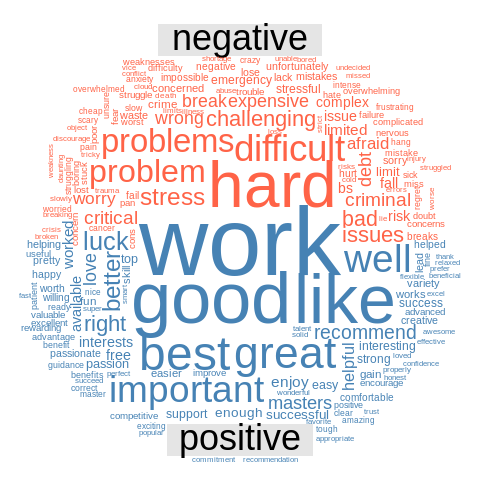

In [36]:
%%R
#plot a word cloud of sentiment
wordcloud_sentiment <- cleanset_df %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("tomato", "steelblue"), scale=c(8,.5),
                   max.words = 200)


In [37]:
%%R 
#get answer id and score and merge with corpus
answers_details_df <- select(answers_df, c(answers_id, answer_score))
answers_details_df$answer_corpus <- NA
answers_details_df$answer_corpus<- cleanset$content
print(dim(answers_details_df))

[1] 51123     3


In [38]:
%%R
str(answers_details_df)

'data.frame':	51123 obs. of  3 variables:
 $ answers_id   : chr  "4e5f01128cae4f6d8fd697cec5dca60c" "ada720538c014e9b8a6dceed09385ee3" "eaa66ef919bc408ab5296237440e323f" "1a6b3749d391486c9e371fbd1e605014" ...
 $ answer_score : num  0 0 0 0 0 0 0 0 0 0 ...
 $ answer_corpus: chr  "phip pyou asking interesting question giving two sites will give explanation may answer questionp p p plet know helpsp" "phi joined army attended college received bachelors degree criminal justice commissioned officers enter militar"| __truncated__ "pdear priyankappgreetings answered question eshwari days ago going reproduce answer bit modifications required "| __truncated__ "pi work global company values highly international experience fact key experience look candidates therefore id "| __truncated__ ...


In [39]:
%%R
# add sentiment score to answer text
answers_details_df$sentiment_score <- sentiment(answers_details_df$answer_corpus)$sentiment 
answers_details_df <- answers_details_df %>% 
      mutate(sentiment_category = case_when(
      sentiment_score < 0 ~ 'Negative',
      sentiment_score == 0 ~ 'Neutral',
      sentiment_score > 0 ~ 'Positive'
      ) %>%
      factor(levels = c('Negative', 'Neutral', 'Positive'))
      )
str(answers_details_df)

'data.frame':	51123 obs. of  5 variables:
 $ answers_id        : chr  "4e5f01128cae4f6d8fd697cec5dca60c" "ada720538c014e9b8a6dceed09385ee3" "eaa66ef919bc408ab5296237440e323f" "1a6b3749d391486c9e371fbd1e605014" ...
 $ answer_score      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ answer_corpus     : chr  "phip pyou asking interesting question giving two sites will give explanation may answer questionp p p plet know helpsp" "phi joined army attended college received bachelors degree criminal justice commissioned officers enter militar"| __truncated__ "pdear priyankappgreetings answered question eshwari days ago going reproduce answer bit modifications required "| __truncated__ "pi work global company values highly international experience fact key experience look candidates therefore id "| __truncated__ ...
 $ sentiment_score   : num  0.229 1.173 1.098 0.519 1.191 ...
 $ sentiment_category: Factor w/ 3 levels "Negative","Neutral",..: 3 3 3 3 3 3 3 3 3 3 ...


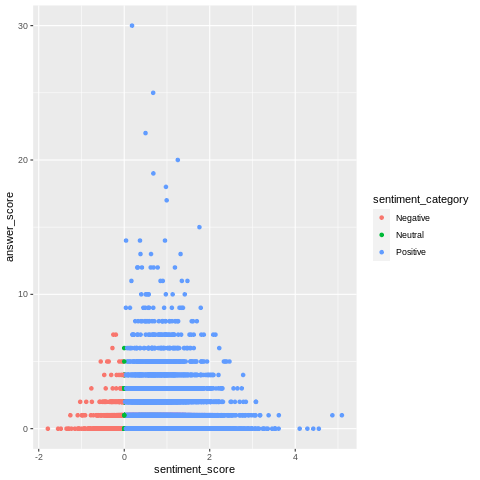

In [40]:
%%R
# scatter plot of sentiment score and answer score
ggplot(answers_details_df, aes(x=sentiment_score, y=answer_score)) + geom_point(aes(color=sentiment_category))

##Session Info

In [41]:
%%R
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] sentimentr_2.9.1   lexicon_1.3.1      reshape2_1.4.4     wordcloud_2.6     
 [5] RColorBrewer_1.1-3 tm_0.7-8           NLP_0.2-1          stringdist_0.9.8  
 [9] tidytext_0.3.2     lubridate_1.8.0    plotly_4.10.0      forcats_0.5.1     
[13] stringr_